##  SENTIMENT ANALYSIS FOR KENYA AIRWAYS

###  AUTHORS

* Winfred Kinya Bundi
* Jeremiah Waiguru
* Paul Ngatia
* Mercy Kiragu

##  1.0  PROJECT OVERVIEW

This project is focused on analyzing customer reviews of Kenya Airways to extract meaningful insights regarding customer satisfaction and service quality. By utilizing sentiment analysis techniques, the project will classify these reviews into positive, negative, or neutral sentiments. The goal is to help Kenya Airways identify areas of excellence as well as aspects of their service that may require improvement. This analysis will serve as a foundation for enhancing customer experience and driving operational improvements.

##  1.1  BUSINESS UNDERSTANDING

In the competitive aviation industry, customer satisfaction plays a vital role in shaping the reputation and success of an airline. Kenya Airways, like many airlines, receives numerous reviews from passengers, which contain valuable feedback about their experiences. Understanding the sentiments behind these reviews is essential for identifying strengths and weaknesses in service delivery. This project will leverage sentiment analysis to process and analyze customer feedback, enabling Kenya Airways to make informed decisions that enhance passenger satisfaction and loyalty.

##  1.2  PROBLEM STATEMENT

Kenya Airways is challenged by the vast amount of unstructured customer feedback available through online reviews. Without an efficient method to analyze this feedback, the airline may overlook critical insights that could lead to service improvements. This project aims to address this challenge by systematically analyzing the sentiment of customer reviews, providing Kenya Airways with a clear understanding of customer perceptions and identifying key areas that require attention.

##  1.3  OBJECTIVES

### Primary objective

To develop a robust sentiment analysis model that accurately classifies customer reviews of Kenya Airways into positive, negative, or neutral sentiments.

###  Specific objectives

1. To explore the sentiment distribution across different customer demographics, travel classes, and time periods.
2. To identify recurring themes and specific aspects of service (e.g., customer service, punctuality, in-flight experience) that are frequently mentioned in the reviews.
3. To assess the performance of various sentiment analysis models and determine the most effective model for this dataset.
4. To generate actionable insights from the sentiment analysis that can be used by Kenya Airways to improve customer service and address common issues

##  2.0  DATA UNDERSTANDING

We did Web Scraping from the 3 websites below and merged our datasets

1. https://uk.trustpilot.com/review/www.kenya-airways.com
2. https://www.airlinequality.com/airline-reviews/kenya-airways/
3. https://www.airlineratings.com/airlines/kenya-airways

The dataset has 3065 rows and 5 columns with the following description ;

* Departures: This column indicates the departure region or type of flight, such as "Africa" or "International."
* Class: This column specifies the class of travel, such as "Economy" or "Business Class."
* Review: This column contains customer reviews of their experiences with Kenya Airways. The text data may include opinions, complaints, and compliments about the airline.
* Rating: This column contains the numeric rating provided by the customer, typically ranging from 1.0 to 5.0, where 1.0 represents "Poor" and 5.0 represents "Excellent."
* Rating_description: This column provides a textual description corresponding to the numeric rating, such as "Poor," "Good," or "Excellent."

## Importing Necessary Libraries

In [62]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px 
import re
import string
import joblib
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud 
from sklearn.metrics import roc_curve, auc

#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. 1 Loading Datasets

### 1.Dataset one

In [63]:
#Kenya_airways_flights
df1= pd.read_csv('Refined data/Dataset_one.csv')
df1.sample(1000)

,Date3,Departures,Class,Review,Rating_Value,Rating_Description
628,2019-04-01,International,Economy,It's unfortunate that I have to write this but...,1.0,Poor
1757,2017-08-01,International,Economy,I was happy to travel with this airline until ...,2.0,Poor
1980,2016-11-01,Africa,Economy,I boarded a Kenyan flight from Zimbabwe to Nai...,2.0,Poor
92,2022-02-01,International,Business Class,"The business class lounge, whilst comfortable ...",5.0,Excellent
1361,2018-04-01,International,Business Class,"Traveling a lot, I was very excited and curiou...",4.0,Good
...,...,...,...,...,...,...
1600,2017-12-01,International,Business Class,It was just the business without any class fro...,2.0,Poor
1501,2020-01-01,0,Unknown,No Review,NaN,Unknown
2324,2016-02-01,International,Economy,I must confess I was not expecting too much wi...,5.0,Excellent
1744,2017-08-01,Africa,Economy,I flew from Johannesburg to Nairobi return. I ...,4.0,Good


In [64]:
def describe_columns(df1):
    # Print column names
    print("Column Names:")
    print(df1.columns)

    # Print number of rows and columns
    print("\nShape:")
    print(df1.shape)

describe_columns(df1)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating_Value',
       'Rating_Description'],
      dtype='object')

Shape:
(2345, 6)


The Dataset has 2345 rows and 6 columns.
The other columns are categorical or text-based.

### 2.Dataset two

In [65]:
#Kenya_airways_reviews
df2= pd.read_csv('Refined data/Dataset_two.csv')
df2.head()

,Date3,Review
0,2024-02-24,✅ Trip Verified | I have never seen such a dis...
1,2024-02-24,Not Verified | Bumped off flight at boarding...
2,2024-07-30,✅ Trip Verified | I am disappointment with t...
3,2024-07-25,✅ Trip Verified | This airline is becoming mo...
4,2024-07-24,✅ Trip Verified | 3 out of 4 flights delayed ...


In [66]:
def describe_columns(df2):
    # Print column names
    print("Column Names:")
    print(df2.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df2.shape)

describe_columns(df2)

Column Names:
Index(['Date3', 'Review'], dtype='object')

Shape:
(477, 2)


The Dataset has 477 rows and 2 columns.

### 3.Dataset three

In [67]:
# KQ_reviews
df3= pd.read_csv('Refined data/Dataset_three.csv')
df3.head()

,Date3,Rating,Review
0,02-08-2024,0.0,Constantly canceling flights Kenya airlines ca...
1,04-08-2024,0.0,Kenya Airways canceled the flight and… Kenya A...
2,30-07-2024,0.0,If your thinking of Kenya Airlines...think aga...
3,29-07-2024,0.0,"Worst airlines ever Worst airlines ever, not f..."
4,25-07-2024,0.0,We were trying to go to Nampula from Nairobi a...


In [68]:
def describe_columns(df3):
    # Print column names
    print("Column Names:")
    print(df3.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df3.shape)

describe_columns(df3)

Column Names:
Index(['Date3', 'Rating', 'Review'], dtype='object')

Shape:
(243, 3)


The Dataset has 243 rows and 3 columns.Mainly, 'Date', 'Rating and 'Review'

## Loading the Merged Dataset

In [69]:
# KQ_Data
df = pd.read_csv('Refined data/KQ_Data.csv')
df

,Date3,Departures,Class,Review,Rating,Rating_Description
0,2022-09-01 00:00:00,Africa,Economy,Recently I travelled for business from Cape To...,4.0,Good
1,2022-11-01 00:00:00,International,Economy,I want to thanks to Jane for her excellent ser...,5.0,Excellent
2,2022-05-01 00:00:00,International,Economy,not a bad airline to fly with could do with a ...,4.0,Good
3,2022-11-01 00:00:00,Africa,Business Class,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0,Poor
4,2022-11-01 00:00:00,Africa,Economy,"Absolutely appalling airline, never ever use i...",1.0,Poor
...,...,...,...,...,...,...
3060,26-01-2017,NaN,NaN,Better than I expected Much better service tha...,0.0,NaN
3061,30-08-2016,NaN,NaN,Request for immediate action. I have never had...,0.0,NaN
3062,02-07-2016,NaN,NaN,Never again Flew with Kenya airways last year ...,0.0,NaN
3063,21-11-2015,NaN,NaN,NEVER AGAIN - RUBISH COMPANY !!! We travelled ...,1.0,NaN


In [70]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

Data Types:
Date3                  object
Departures             object
Class                  object
Review                 object
Rating                float64
Rating_Description     object
dtype: object

Shape:
(3065, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date3               3063 non-null   object 
 1   Departures          2345 non-null   object 
 2   Class               2345 non-null   object 
 3   Review              3065 non-null   object 
 4   Rating              2578 non-null   float64
 5   Rating_Description  2345 non-null   object 
dtypes: float64(1), object(5)
memory usage: 143.8+ KB
None

Descriptive Statistics:
            Rating
count  2578.000000
mean      2.865012
std 

The dataset has 3065 rows and 6 columns. It also has missing values, with some columns registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the Review column needs preprocessing since it contains raw text with numbers, nametags,emojis and punctuations.

## 3.0 DATA PREPARATION

### 3.1  Data Cleaning

Steps to start cleaning the data:

*  Focus on the columns or attributes that are relevant for your analysis or purposes.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

In [71]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print("Missing values in each column:")
print(missing_values)

# Check the percentage of missing values in each column (optional)
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Missing values in each column:
Date3                   2
Departures            720
Class                 720
Review                  0
Rating                487
Rating_Description    720
dtype: int64

Percentage of missing values in each column:
Date3                  0.065253
Departures            23.491028
Class                 23.491028
Review                 0.000000
Rating                15.889070
Rating_Description    23.491028
dtype: float64


Overall Insights:
* High Missing Data: Columns Departures, Class, and Rating_Description have a significant amount of missing data (23.49%). 
* Depending on the analysis, we have the option to either impute these values, drop the rows/columns, or find another way to handle them.(Use placeholders)
* Moderate Missing Data: The Rating column has a moderate level of missing values (15.89%), which could influence the analysis if not addressed.
* Low Missing Data: The Date3 column has very few missing values (0.07%), making it easier to handle.

###  dealing with missing values
For the columns: (Departures, Class, Date3, and Rating_Description) we will replace them with placeholders so as to retain them since they can be helpful in analysis. For the Rating column however, we will fill missing values with the median of that column.

In [72]:
df = pd.read_csv('Refined data/KQ_Data.csv')

# Replace missing values with placeholders
# Specify the placeholder for each column or use a general placeholder for all missing values

df['Date3'].fillna('Missing Date', inplace=True)
df['Departures'].fillna('Unknown', inplace=True)
df['Class'].fillna('Unknown', inplace=True)
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Rating_Description'].fillna('Poor', inplace=True)

# Check the result
df.sample(200)


,Date3,Departures,Class,Review,Rating,Rating_Description
1954,2017-03-01 00:00:00,International,Economy,We had not used Kenya Airways before and so di...,4.0,Good
2538,2019-04-02 00:00:00,Unknown,Unknown,✅ Trip Verified | New York to Entebbe via Nai...,3.0,Poor
2343,2016-01-01 00:00:00,International,Economy,During our trip to South Africa we traveled fo...,3.0,Average
2553,2018-11-27 00:00:00,Unknown,Unknown,✅ Trip Verified | London to Zanzibar via Nair...,3.0,Poor
1785,2017-08-01 00:00:00,International,Economy,The flight was delayed but Airline provided us...,3.0,Average
...,...,...,...,...,...,...
1452,2018-03-01 00:00:00,Africa,Economy,My first experience on Kenya airways. I always...,3.0,Average
1749,2017-08-01 00:00:00,International,Economy,"Great airline, nice and friendly helpful staff...",5.0,Excellent
2825,29-07-2024,Unknown,Unknown,"Worst airlines ever Worst airlines ever, not f...",0.0,Poor
2620,2016-12-19 00:00:00,Unknown,Unknown,✅ Verified Review | Johannesburg to Bangkok v...,3.0,Poor


In [73]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values

Date3                 0
Departures            0
Class                 0
Review                0
Rating                0
Rating_Description    0
dtype: int64

Our Dataset is now okay and does not contain any Missing data

## Data Preprocessing

#### Feature selection

In [74]:
df.columns

Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

In [75]:
KQ_df = df[['Rating_Description', 'Review']]
KQ_df.head(10)

,Rating_Description,Review
0,Good,Recently I travelled for business from Cape To...
1,Excellent,I want to thanks to Jane for her excellent ser...
2,Good,not a bad airline to fly with could do with a ...
3,Poor,"Dear Kenya Airways ,\r\n\r\nI am on my way to ..."
4,Poor,"Absolutely appalling airline, never ever use i..."
5,Excellent,We flew from Heathrow to Nairobi on our way to...
6,Poor,Was travling from Kenya to South Africa last w...
7,Good,"After reading the reviews on here, I was prepa..."
8,Poor,"Kenya Airways is very disorganzied, first of a..."
9,Poor,I travelled to London on July 10th ON KQ100 wi...


From our data overview, the Review column contains raw text with unwanted characters, numbers,whitespaces, punctuations and also nametags which will need to be parsed.

In [76]:
# Remove special characters, unwanted characters, unnecessary phrases
def remove_special_characters(text):
    text = re.sub(r'\r\n|\n', ' ', text)
    return text

def remove_extra_whitespace(text):
    text = ' '.join(text.split())
    return text

def convert_to_lowercase(text):
    text = text.lower()
    return text

def remove_unnecessary_phrases(text):
    text = re.sub(r'dear\s+[\w\s]+,', '', text)
    return text

def standardize_rating_descriptions(rating):
    rating_mapping = {
        'Excellent': 'excellent',
        'Good': 'good',
        'Poor': 'poor'
    }
    return rating_mapping.get(rating, rating)


In [77]:
def clean_text(text):
    text = remove_special_characters(text)
    text = remove_extra_whitespace(text)
    text = convert_to_lowercase(text)
    text = remove_unnecessary_phrases(text)
    return text

# Apply the cleaning function to the 'Review' column
KQ_df['Review'] = KQ_df['Review'].apply(clean_text)

# Apply the standardization function to the 'Rating_Description' column
KQ_df['Rating_Description'] = KQ_df['Rating_Description'].apply(standardize_rating_descriptions)

# Display the cleaned DataFrame
KQ_df.head(10)


,Rating_Description,Review
0,good,recently i travelled for business from cape to...
1,excellent,i want to thanks to jane for her excellent ser...
2,good,not a bad airline to fly with could do with a ...
3,poor,"i am on my way to zanzibar from bangui, with ..."
4,poor,"absolutely appalling airline, never ever use i..."
5,excellent,we flew from heathrow to nairobi on our way to...
6,poor,was travling from kenya to south africa last w...
7,good,"after reading the reviews on here, i was prepa..."
8,poor,"kenya airways is very disorganzied, first of a..."
9,poor,i travelled to london on july 10th on kq100 wi...


In [78]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df["Review"] = KQ_df["Review"].apply(remove_nametags)
KQ_df.head(10)

,Rating_Description,Review
0,good,recently i travelled for business from cape to...
1,excellent,i want to thanks to jane for her excellent ser...
2,good,not a bad airline to fly with could do with a ...
3,poor,"i am on my way to zanzibar from bangui, with a..."
4,poor,"absolutely appalling airline, never ever use i..."
5,excellent,we flew from heathrow to nairobi on our way to...
6,poor,was travling from kenya to south africa last w...
7,good,"after reading the reviews on here, i was prepa..."
8,poor,"kenya airways is very disorganzied, first of a..."
9,poor,i travelled to london on july 10th on kq100 wi...


In [79]:
# Remove numbers and punctuations
# numbers
num_pattern = r'[0-9]'
KQ_df['Review'] = KQ_df['Review'].replace(to_replace=num_pattern, value='', regex=True)

# punctuations
KQ_df['Review'] = KQ_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

KQ_df.head(10)

,Rating_Description,Review
0,good,recently i travelled for business from cape to...
1,excellent,i want to thanks to jane for her excellent ser...
2,good,not a bad airline to fly with could do with a ...
3,poor,i am on my way to zanzibar from bangui with an...
4,poor,absolutely appalling airline never ever use it...
5,excellent,we flew from heathrow to nairobi on our way to...
6,poor,was travling from kenya to south africa last w...
7,good,after reading the reviews on here i was prepar...
8,poor,kenya airways is very disorganzied first of al...
9,poor,i travelled to london on july th on kq with c...


In [80]:
#remove emojis
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

KQ_df["Review"] = KQ_df["Review"].apply(remove_emojis)


In [81]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string 

KQ_df["Review"] = KQ_df["Review"].apply(remove_non_standard_char)

KQ_df.head(10)

,Rating_Description,Review
0,good,recently i travelled for business from cape to...
1,excellent,i want to thanks to jane for her excellent ser...
2,good,not a bad airline to fly with could do with a ...
3,poor,i am on my way to zanzibar from bangui with an...
4,poor,absolutely appalling airline never ever use it...
5,excellent,we flew from heathrow to nairobi on our way to...
6,poor,was travling from kenya to south africa last w...
7,good,after reading the reviews on here i was prepar...
8,poor,kenya airways is very disorganzied first of al...
9,poor,i travelled to london on july th on kq with c...


In [82]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
KQ_df['Review'] = KQ_df['Review'].str.replace(urlpattern, '')

In [83]:
# list stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would','youve']

In [84]:
def remove_stopwords(words):
    """A simple function to remove stopwords from a string"""
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df['Review'] = KQ_df['Review'].apply(remove_stopwords)
# Print the first 5 rows of the new column
KQ_df.head(10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_2460\2161058523.py", line 9, in <module>
    KQ_df['Review'] = KQ_df['Review'].apply(remove_stopwords)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\pandas\core\series.py", line 4764, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\pandas\core\apply.py", line 1209, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\pandas\core\apply.py", line 1289, in apply_standard
    mapped = obj._map_values(
             ^^^^^^^^^^^^^^^^
  File "c:\Users\USER\.anaconda\A\New folder\Lib\site-packages\pandas\core\base.py", line 92

Stopwords are common in texts but offer minimal semantic value. Removing them helps reduce noise and highlights more significant words, enhancing the efficiency and effectiveness of our models. We tailored our stopword list to include terms that we believe diminish the overall sentiment.

#### Stemming

In [ ]:
stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()
def stem_words(review):
    """A function to stem words in a review text"""
    stem_words = []
    for word in review.split():
        stem_word = stemmer.stem(word)
        stem_words.append(stem_word)
    return " ".join(stem_words)

KQ_df["Review"] = KQ_df["Review"].apply(stem_words)
KQ_df.head(10)

,Rating_Description,Review
0,good,recent travel busi cape town entebb uganda lay...
1,excellent,want thank jane excel servic flight connect ke...
2,good,not bad airlin fli could better select movi mu...
3,poor,way zanzibar bangui upgrad flight sky prioriti...
4,poor,absolut appal airlin never ever use incred unr...
5,excellent,flew heathrow nairobi way zanzibar plane boe d...
6,poor,travl kenya south africa last week head board ...
7,good,read review prepar worst say websit difficult ...
8,poor,kenya airway disorganzi first never answer pho...
9,poor,travel london juli th kq children paid upgrad ...


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def tokenize_reviews(df):
    """Function to tokenize each review in the 'Review' column."""
    df['Tokenized_Review'] = df['Review'].apply(nltk.word_tokenize)
    return df

# Apply the function to your DataFrame
KQ_df = tokenize_reviews(KQ_df)

# Display the DataFrame to see the tokenized reviews
(KQ_df[['Rating_Description','Review', 'Tokenized_Review']].head())


,Rating_Description,Review,Tokenized_Review
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga..."
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con..."
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,..."
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p..."
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc..."


In [ ]:

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tokenize each review in the 'Review' column and get the impactful words
num_words = 5  # Number of impactful words to extract
KQ_df['Tokenized_Review'] = KQ_df['Review'].apply(nltk.word_tokenize)

# Calculate sentiment scores and extract impactful words
KQ_df['Impactful_Words'] = KQ_df['Tokenized_Review'].apply(
    lambda tokens: [word for word, score in sorted(
        {token: sia.polarity_scores(token)["compound"] for token in tokens}.items(),
        key=lambda x: x[1], reverse=True
    )][:num_words]
)

# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review', 'Tokenized_Review', 'Impactful_Words']].head())


,Rating_Description,Review,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"


In [ ]:
# Initialize empty lists to store positive and negative impactful words
positive_impactful_words = []
negative_impactful_words = []

# Loop through each tokenized review
for tokens in KQ_df['Tokenized_Review']:
    # Calculate sentiment scores for each token
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    
    # Sort tokens by their sentiment scores
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
    # Categorize words as positive or negative based on their sentiment score
    for word, score in sorted_words:
        if score > 0:  # Positive score
            positive_impactful_words.append(word)
        elif score < 0:  # Negative score
            negative_impactful_words.append(word)

# Output the lists of positive and negative impactful words
("Positive Impactful Words:", positive_impactful_words)
("Negative Impactful Words:", negative_impactful_words)


('Negative Impactful Words:',
 ['pay',
  'stop',
  'bad',
  'bad',
  'pay',
  'miss',
  'stop',
  'lost',
  'bad',
  'strike',
  'miss',
  'cancel',
  'avoid',
  'bother',
  'pretend',
  'strike',
  'miss',
  'complain',
  'hard',
  'pay',
  'delay',
  'difficult',
  'problem',
  'worst',
  'rude',
  'bad',
  'complaint',
  'cancel',
  'embarrass',
  'sad',
  'pay',
  'cancel',
  'fault',
  'lose',
  'poor',
  'bad',
  'hard',
  'pay',
  'cancel',
  'lost',
  'interrupt',
  'spam',
  'problem',
  'fault',
  'wrong',
  'bad',
  'cancel',
  'disgust',
  'hard',
  'avoid',
  'delay',
  'cramp',
  'pay',
  'miss',
  'delay',
  'lack',
  'disappoint',
  'poor',
  'stolen',
  'fail',
  'worst',
  'pay',
  'low',
  'stop',
  'worn',
  'shock',
  'problem',
  'poor',
  'bad',
  'worst',
  'complain',
  'bad',
  'scam',
  'miss',
  'delay',
  'rude',
  'delay',
  'disappoint',
  'pay',
  'drop',
  'delay',
  'destroy',
  'worst',
  'mistaken',
  'sad',
  'worst',
  'rude',
  'disappoint',
  'mi

In [ ]:
# Dividing the KQ_df DataFrame based on the 'Rating_Description' column

# DataFrame for "Poor" ratings
neg_df = KQ_df[KQ_df['Rating_Description'] == 'poor']

# DataFrame for "Excellent" ratings
pos_df = KQ_df[KQ_df['Rating_Description'] == 'excellent']

# DataFrame for "Good" ratings
neu_df = KQ_df[KQ_df['Rating_Description'] == 'good']

# Optional: Display the first few rows of each DataFrame to verify the split
print("Negative Reviews (poor):")
(neg_df.head())



Negative Reviews (poor):


,Rating_Description,Review,Tokenized_Review,Impactful_Words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"
6,poor,travl kenya south africa last week head board ...,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]"
8,poor,kenya airway disorganzi first never answer pho...,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]"
9,poor,travel london juli th kq children paid upgrad ...,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]"


In [ ]:
print("Neutral Reviews (good):")
(neu_df.head())

Neutral Reviews (good):


,Rating_Description,Review,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
7,good,read review prepar worst say websit difficult ...,"[read, review, prepar, worst, say, websit, dif...","[good, fine, read, review, prepar]"
38,good,checkin klm sky prioriti check counter subsequ...,"[checkin, klm, sky, prioriti, check, counter, ...","[love, greatest, great, super, superior]"
43,good,st famili holiday holiday us last year due cov...,"[st, famili, holiday, holiday, us, last, year,...","[love, great, wow, kind, cheer]"


In [ ]:
print("Positive Reviews (excellent):")
(pos_df.head())


Positive Reviews (excellent):


,Rating_Description,Review,Tokenized_Review,Impactful_Words
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]"
11,excellent,great servic friend staff belinda calvin frien...,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]"
15,excellent,pleasant surpris airlin servic good smooth lan...,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]"
39,excellent,amaz servic st leg room suffici that realli co...,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]"


In [ ]:

def positive_impactful_words(review, num_words=2):
    """Gets the most impactful positive words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words if score > 0][:num_words]
    return impactful_words

def negative_impactful_words(review, num_words=2):
    """Gets the most impactful negative words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1])
    impactful_words = [word for word, score in sorted_words if score < 0][:num_words]
    return impactful_words

# Apply these functions to your DataFrame
pos_df['impactful_words'] = pos_df['Review'].apply(positive_impactful_words)
neg_df['impactful_words'] = neg_df['Review'].apply(negative_impactful_words)


In [ ]:
pos_df.head()

,Rating_Description,Review,Tokenized_Review,Impactful_Words,impactful_words
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]","[excel, nice]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]","[friend, good]"
11,excellent,great servic friend staff belinda calvin frien...,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]","[great, friend]"
15,excellent,pleasant surpris airlin servic good smooth lan...,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]","[pleasant, good]"
39,excellent,amaz servic st leg room suffici that realli co...,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]","[great, friend]"


In [ ]:
neg_df.head()

,Rating_Description,Review,Tokenized_Review,Impactful_Words,impactful_words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]","[bad, lost]"
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]","[bother, avoid]"
6,poor,travl kenya south africa last week head board ...,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]","[complain, miss]"
8,poor,kenya airway disorganzi first never answer pho...,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]","[bad, rude]"
9,poor,travel london juli th kq children paid upgrad ...,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]",[complaint]


#### EXPLORATORY DATA ANALYSIS(EDA)

#### DISTRIBUTION OF RATINGS

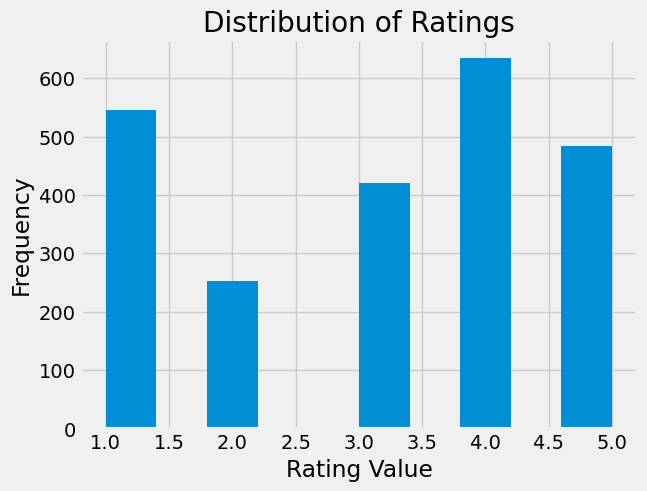

In [ ]:
df1['Rating_Value'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()


 A majority of ratings cluster around the higher end of the scale, with 4.0 and 5.0 being the most frequent. This indicates a positive bias in the dataset, as lower ratings are significantly less common. Such a distribution might suggest high overall customer satisfaction or potential rating inflation. 


#### CHECKING THE SPREAD OF RATINGS

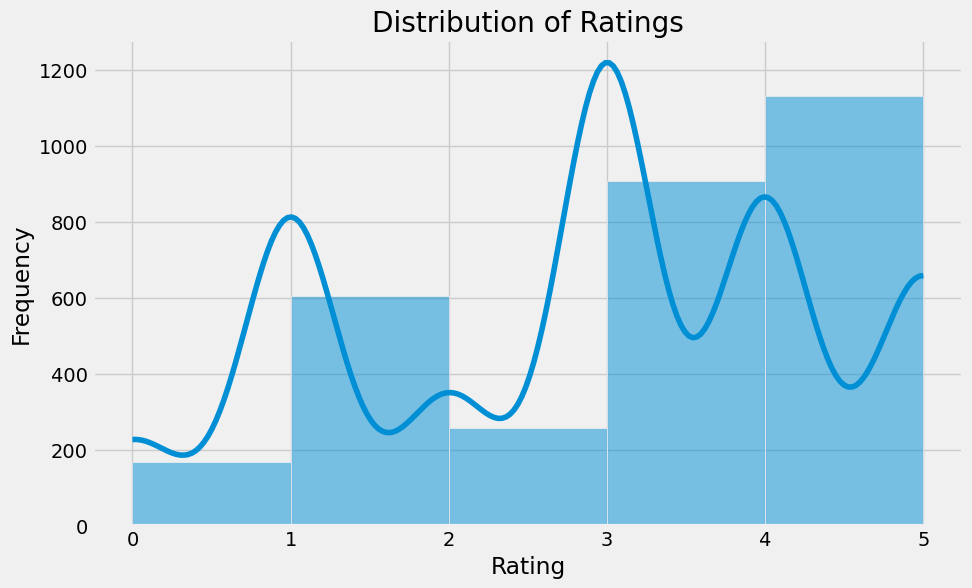

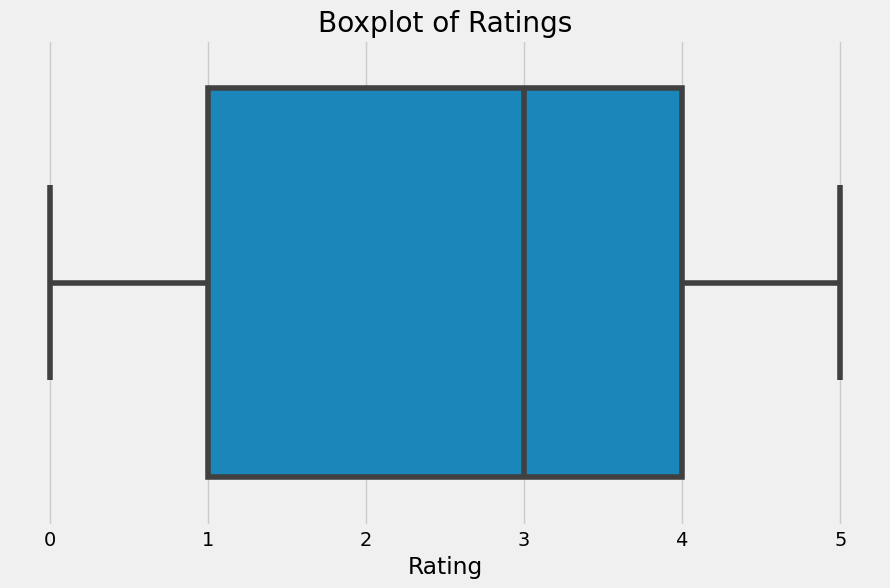

In [ ]:
# Plot the distribution of the Rating column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the spread of Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()


 The histogram displaying rating frequencies reveals a right-skewed pattern, with a concentration of higher ratings. This suggests a positive bias in customer sentiment, as scores tend to cluster towards the upper end of the rating scale.










The boxplot reveals a relatively symmetrical distribution of ratings with minimal variation. The median rating falls around 3, indicating that half of the ratings are above this point and half are below. The box, representing the interquartile range, is relatively narrow, suggesting that the majority of ratings cluster around the median. The presence of whiskers and outliers is minimal, indicating a lack of extreme values in the dataset. 


#### CHECKING THE DISTRIBUTION OF REVIEW LENGTHS AND ITS RELATIONSHIP WITH RATING.

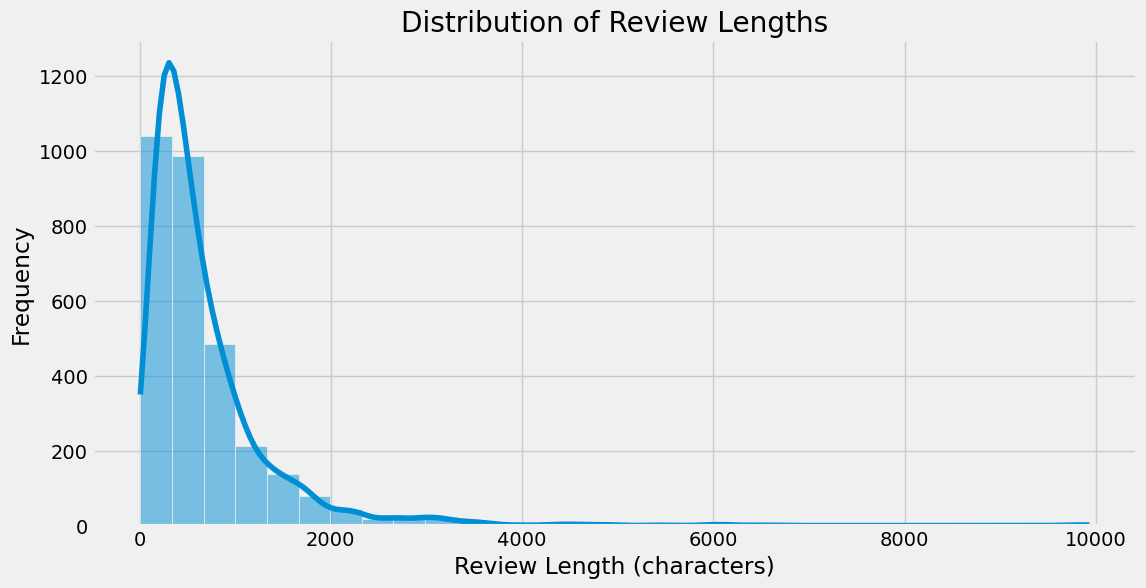

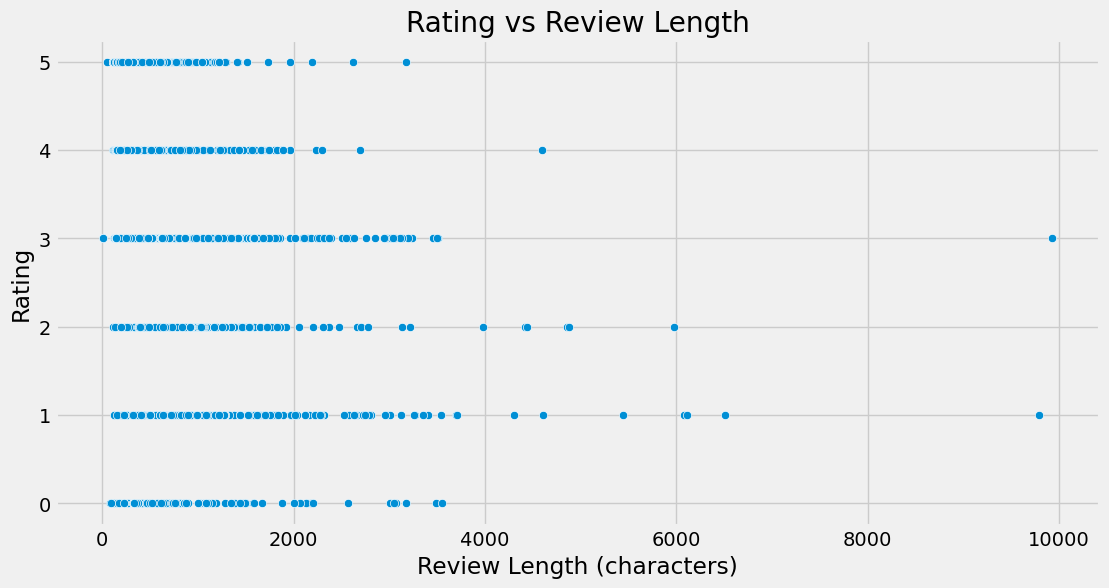

In [ ]:
# Add a column for the length of each review
df['Review_Length'] = df['Review'].apply(lambda x: len(str(x)))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['Review_Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Scatterplot of Rating vs Review Length
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Review_Length', y='Rating', data=df)
plt.title('Rating vs Review Length')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()


The distribution is heavily skewed to the right, indicating that most reviews are relatively short. A significant portion of reviews falls within the first 2000 characters, with a rapid decline in frequency as review length increases. The presence of a long tail suggests the existence of a smaller number of very long reviews.

The scatter plot reveals a lack of correlation between review length and rating. This indicates that the length of a review does not significantly influence the score assigned by the customer. Factors beyond review length likely contribute more to the rating assigned by the customer.

#### WORD CLOUD FOR REVIEWS

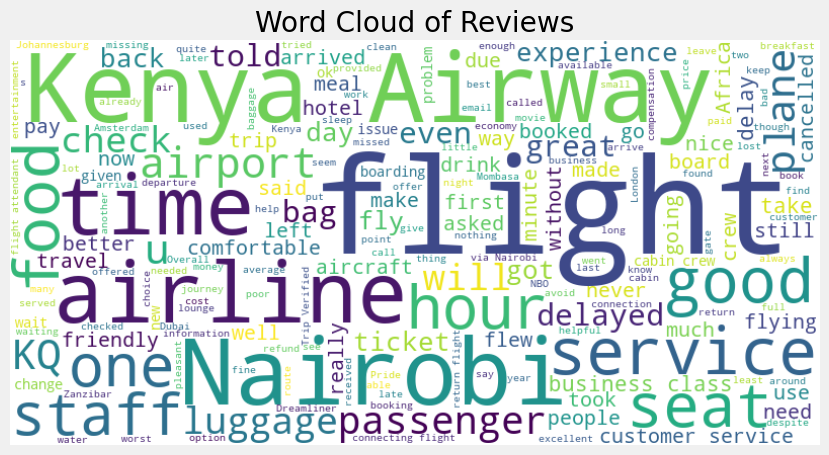

In [ ]:


text = ' '.join(review for review in df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


#### TOP 20 POSITIVE AND NEGATIVE IMPACTFUL WORDS

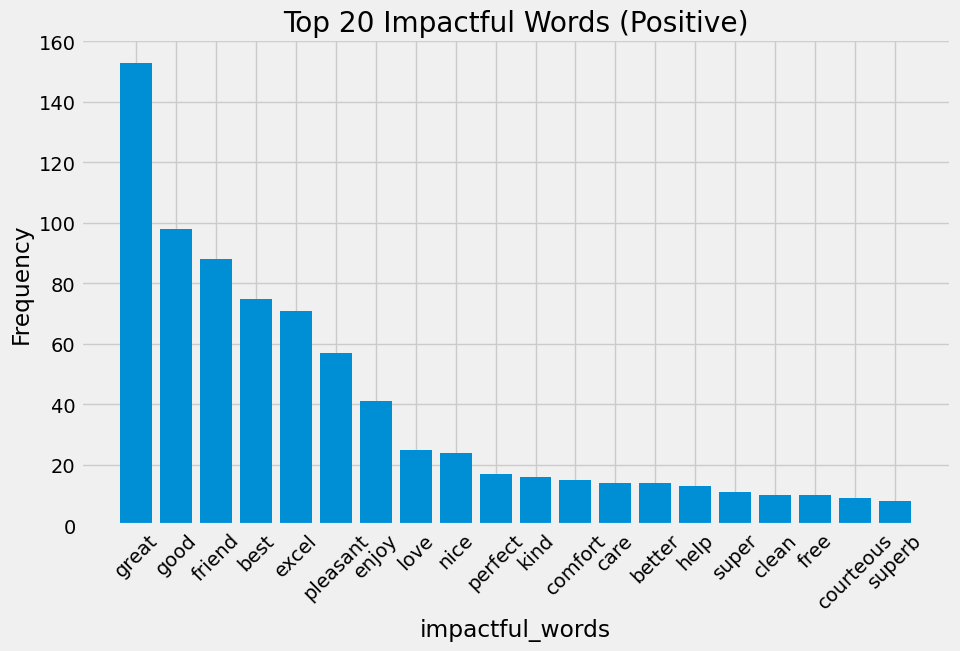

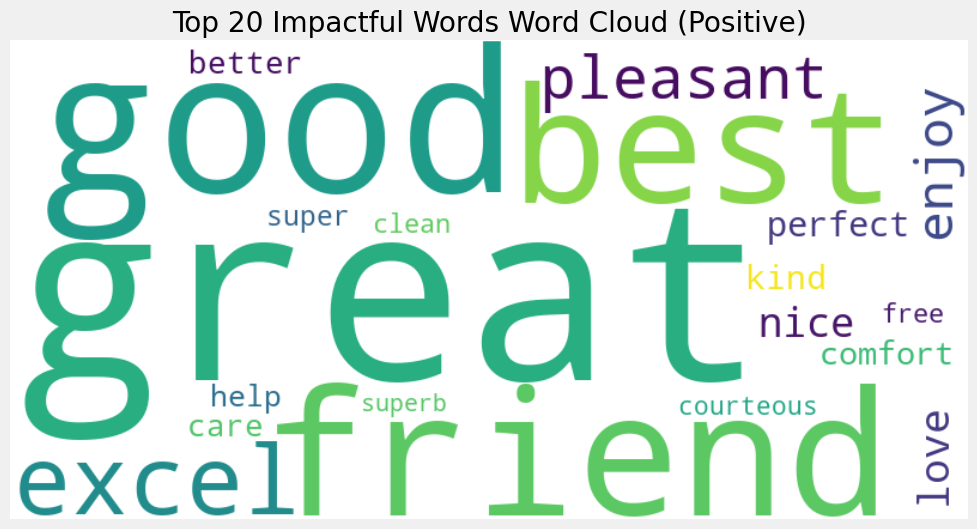

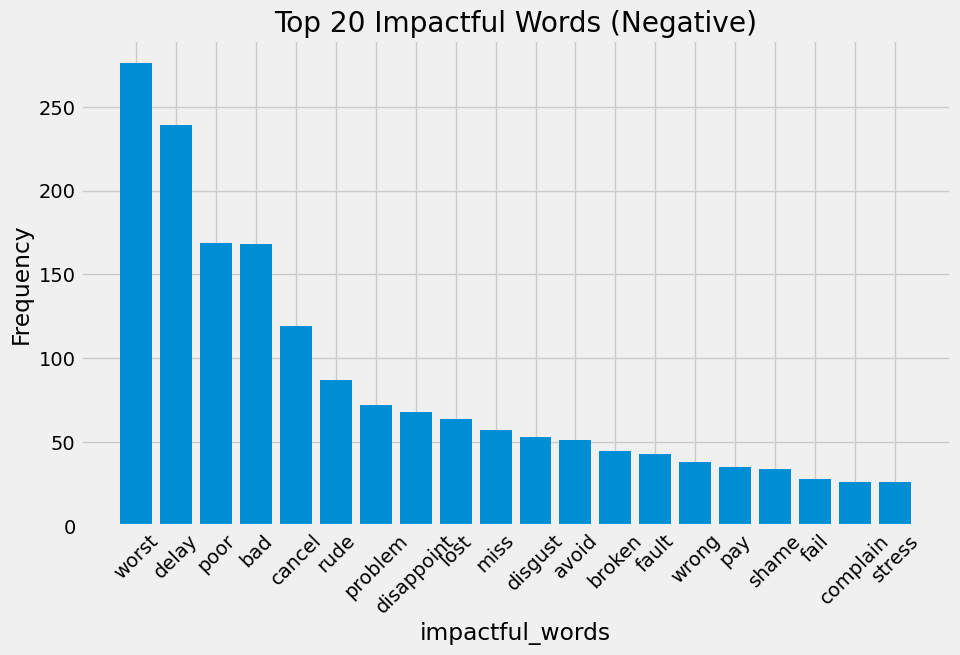

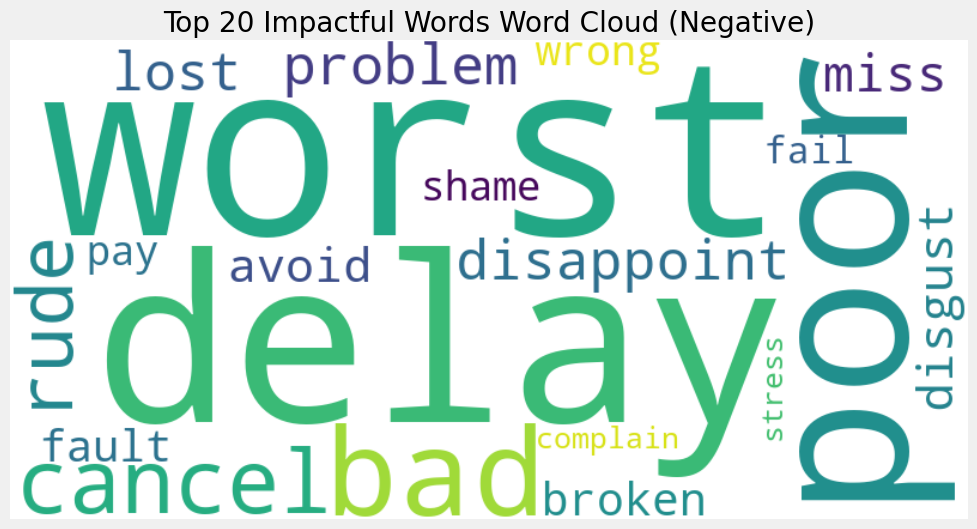

In [ ]:
def plot_top_words(df, category, num_words=20, column='impactful_words'):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df[column].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')


#### AVERAGE RATING BY CLASS

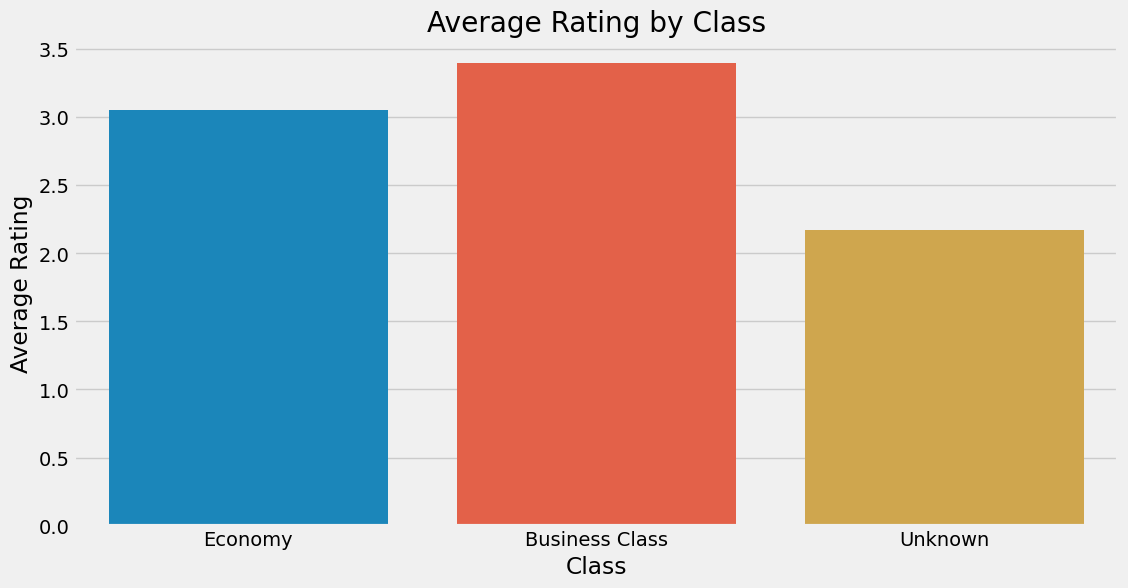

In [ ]:
# Average Rating by Class
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Rating', data=df, ci=None)
plt.title('Average Rating by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.show()


There seems to be a clear disparity in average ratings based on passenger class. Business Class passengers report significantly higher satisfaction levels compared to Economy Class passengers. 



#### AVERAGE RATING BY DEPARTURE TYPE


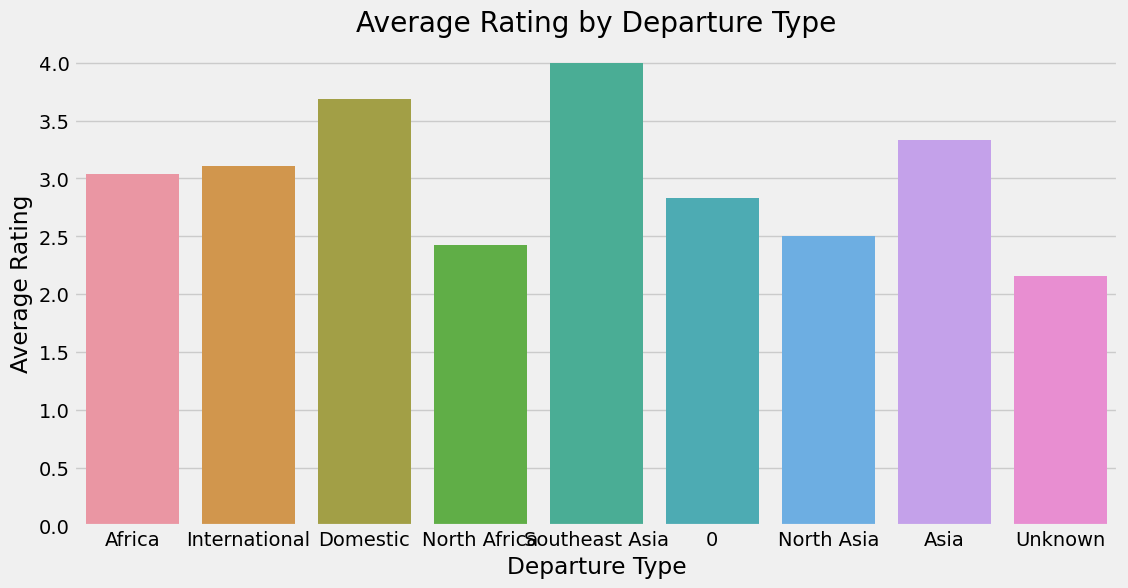

In [ ]:
# Average Rating by Departure Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Departures', y='Rating', data=df, ci=None)
plt.title('Average Rating by Departure Type')
plt.xlabel('Departure Type')
plt.ylabel('Average Rating')
plt.show()


There are variations in average ratings across different departure types, suggesting that factors related to departure location might influence passenger satisfaction.

##### CORRELATION ANALYSIS BETWEEN RATING AND REVIEW LENGTH.


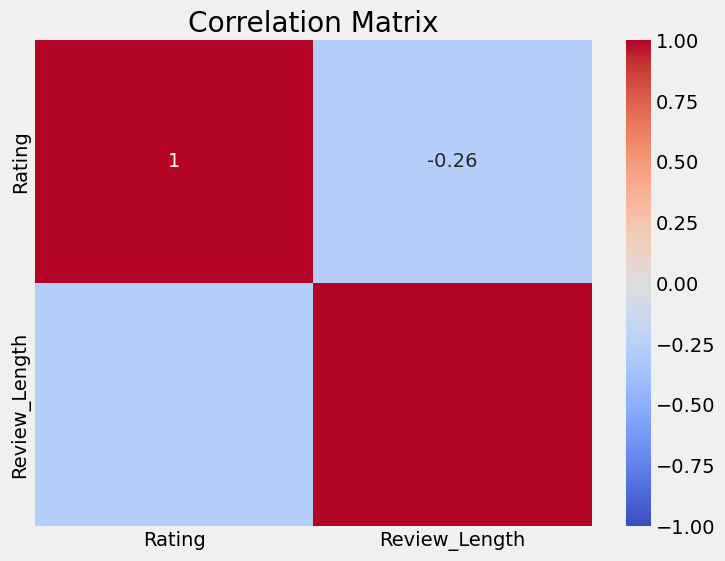

In [ ]:
# Compute correlation matrix for numerical columns
correlation_matrix = df[['Rating', 'Review_Length']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix indicates a weak negative correlation (-0.26) between Rating and Review_Length. This implies that as the length of a review increases, the rating tends to slightly decrease, but the relationship is not particularly strong.

In other words, longer reviews are not necessarily associated with significantly higher or lower ratings. Other factors likely play a more significant role in determining the rating assigned to a review.

##  MODELLING

###  Prepare the data

In [ ]:
KQ_df.columns

Index(['Rating_Description', 'Review', 'Tokenized_Review', 'Impactful_Words'], dtype='object')

In [ ]:
# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review', 'Tokenized_Review', 'Impactful_Words']].head())

,Rating_Description,Review,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"


In [ ]:
# Check the first few entries in the Tokenized_Review column
print(KQ_df['Tokenized_Review'].head())

0    [recent, travel, busi, cape, town, entebb, uga...
1    [want, thank, jane, excel, servic, flight, con...
2    [not, bad, airlin, fli, could, better, select,...
3    [way, zanzibar, bangui, upgrad, flight, sky, p...
4    [absolut, appal, airlin, never, ever, use, inc...
Name: Tokenized_Review, dtype: object


In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called `df` with a column named 'rating'

# 1. Create a mapping dictionary
rating_mapping = {
    'poor': 'negative',
    'good': 'neutral',
    'average': 'neutral',
    'excellent': 'positive',
    'unknown': 'neutral'  # or you can drop/handle unknown separately
}

# 2. Apply the mapping to the 'rating' column
KQ_df['sentiment'] = KQ_df['Rating_Description'].map(rating_mapping)

# 3. If you want to check the transformation
print(KQ_df[['Rating_Description', 'sentiment']].head())

# Now, the 'sentiment' column will have the transformed values: 'negative', 'neutral', and 'positive'


  Rating_Description sentiment
0               good   neutral
1          excellent  positive
2               good   neutral
3               poor  negative
4               poor  negative


In [ ]:
# Convert the list of tokens in Tokenized_Review to a single string for each review
X = KQ_df['Tokenized_Review'].apply(lambda x: ' '.join(x))

# Target variable is the Rating_Description
y = KQ_df['sentiment']

# Display the first few rows to confirm the transformation
print(X.head())
print(y.head())


0    recent travel busi cape town entebb uganda lay...
1    want thank jane excel servic flight connect ke...
2    not bad airlin fli could better select movi mu...
3    way zanzibar bangui upgrad flight sky prioriti...
4    absolut appal airlin never ever use incred unr...
Name: Tokenized_Review, dtype: object
0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: sentiment, dtype: object


In [ ]:
KQ_df

,Rating_Description,Review,Tokenized_Review,Impactful_Words,sentiment
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]",neutral
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]",positive
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]",neutral
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]",negative
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]",negative
...,...,...,...,...,...
3060,poor,better expect much better servic expect especi...,"[better, expect, much, better, servic, expect,...","[better, comfort, expect, much, servic]",negative
3061,poor,request immedi action never night mare use ken...,"[request, immedi, action, never, night, mare, ...","[good, dream, number, request, immedi]",negative
3062,poor,never flew kenya airway last year octoberunfor...,"[never, flew, kenya, airway, last, year, octob...","[save, treat, admit, never, flew]",negative
3063,poor,never rubish compani travel zanzibar octob lon...,"[never, rubish, compani, travel, zanzibar, oct...","[never, rubish, compani, travel, zanzibar]",negative


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df` and the column of interest is 'sentiment'

# Check the unique classes in the 'sentiment' column
unique_classes = KQ_df['sentiment'].unique()

# Print the unique classes
print("Unique classes in the 'sentiment' column:")
print(unique_classes)


Unique classes in the 'sentiment' column:
['neutral' 'positive' 'negative' nan]


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df` and the column of interest is 'sentiment'

# Count NaN values in the 'sentiment' column
nan_count_sentiment = KQ_df['sentiment'].isna().sum()

# Print the count of NaN values in the 'sentiment' column
print(f"Number of NaN values in 'sentiment' column: {nan_count_sentiment}")


Number of NaN values in 'sentiment' column: 430


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df` and the column of interest is 'sentiment'

# Calculate the mode (most frequent value) of the 'sentiment' column
most_frequent_class = KQ_df['sentiment'].mode()[0]

# Replace NaN values with the most frequent class
KQ_df['sentiment'].fillna(most_frequent_class, inplace=True)

# Print the DataFrame to verify
print("DataFrame after replacing NaN values in 'sentiment' column:")
(KQ_df.head())


DataFrame after replacing NaN values in 'sentiment' column:


,Rating_Description,Review,Tokenized_Review,Impactful_Words,sentiment
0,good,recent travel busi cape town entebb uganda lay...,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]",neutral
1,excellent,want thank jane excel servic flight connect ke...,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]",positive
2,good,not bad airlin fli could better select movi mu...,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]",neutral
3,poor,way zanzibar bangui upgrad flight sky prioriti...,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]",negative
4,poor,absolut appal airlin never ever use incred unr...,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]",negative


###  Model Training


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Split the data into training and testing sets
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. LOGISTIC REGRESSION WITH TF-IDF

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       389
           1       0.46      0.30      0.37       126
           2       0.59      0.45      0.51        98

    accuracy                           0.73       613
   macro avg       0.62      0.56      0.58       613
weighted avg       0.70      0.73      0.70       613



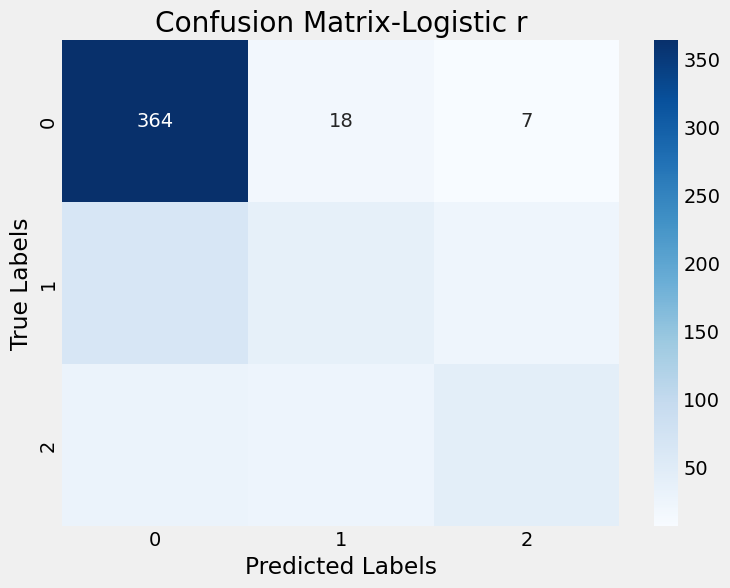

In [ ]:
# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-Logistic r')
plt.show()


###  2. NAIVE BAYES

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       389
           1       0.50      0.01      0.02       126
           2       0.00      0.00      0.00        98

    accuracy                           0.64       613
   macro avg       0.38      0.34      0.26       613
weighted avg       0.51      0.64      0.50       613



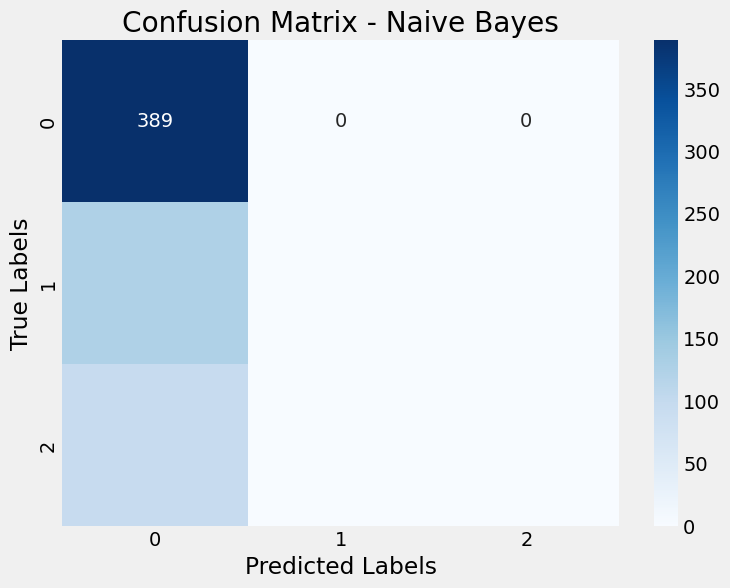

In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Compute and plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

###  3.  SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       389
           1       0.41      0.36      0.38       126
           2       0.52      0.48      0.50        98

    accuracy                           0.71       613
   macro avg       0.59      0.57      0.58       613
weighted avg       0.70      0.71      0.70       613



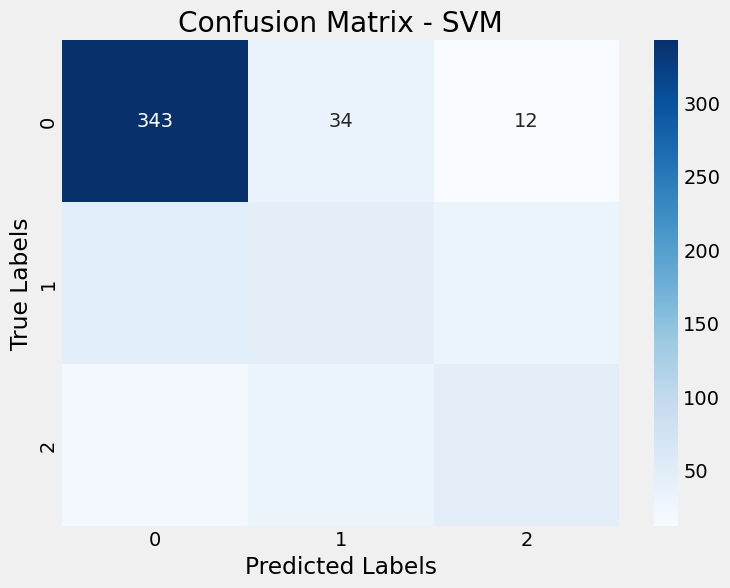

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Compute and plot the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


###  4.  RANDOM FOREST

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       389
           1       0.46      0.25      0.33       126
           2       0.72      0.32      0.44        98

    accuracy                           0.72       613
   macro avg       0.64      0.51      0.54       613
weighted avg       0.69      0.72      0.67       613



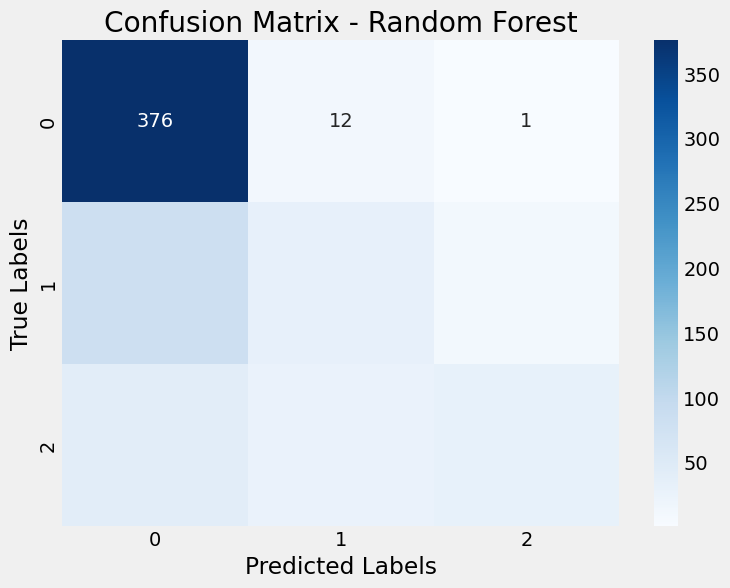

In [ ]:

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

###  5.  XG-BOOST

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       389
           1       0.46      0.40      0.43       126
           2       0.52      0.42      0.46        98

    accuracy                           0.73       613
   macro avg       0.60      0.58      0.59       613
weighted avg       0.71      0.73      0.71       613



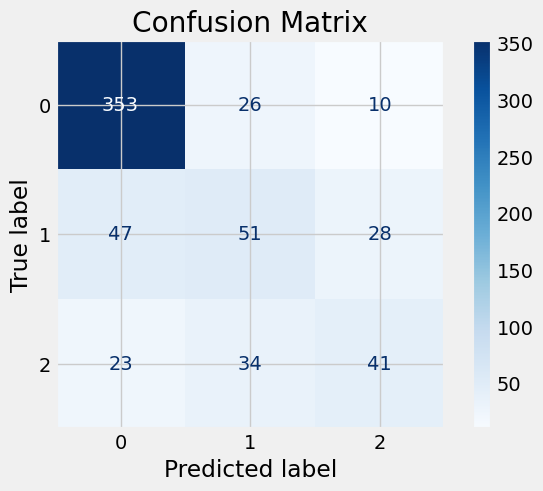

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the XGBoost model with the encoded labels
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train_encoded)

# To predict on the test set and get the original labels back:
y_pred_xgb_encoded = xgb_model.predict(X_test_tfidf)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb, labels=label_encoder.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# COMBINED CODE

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       389
           1       0.41      0.37      0.39       126
           2       0.50      0.55      0.53        98

    accuracy                           0.71       613
   macro avg       0.59      0.60      0.59       613
weighted avg       0.71      0.71      0.71       613

Logistic Regression Accuracy: 0.7113
Logistic Regression RMSE: 0.6563


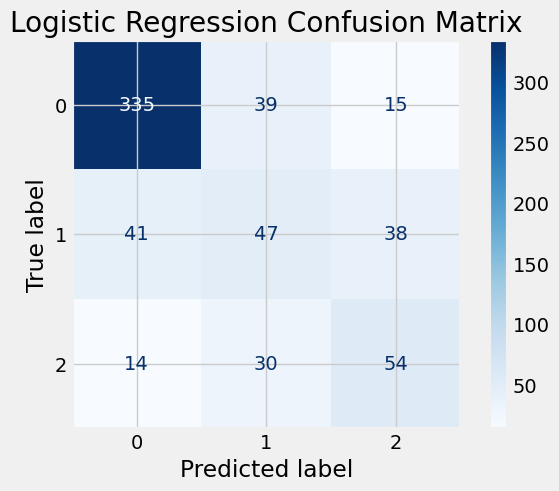

------------------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       389
           1       0.46      0.41      0.44       126
           2       0.60      0.50      0.55        98

    accuracy                           0.73       613
   macro avg       0.63      0.60      0.61       613
weighted avg       0.72      0.73      0.72       613

Random Forest Accuracy: 0.7292
Random Forest RMSE: 0.6500


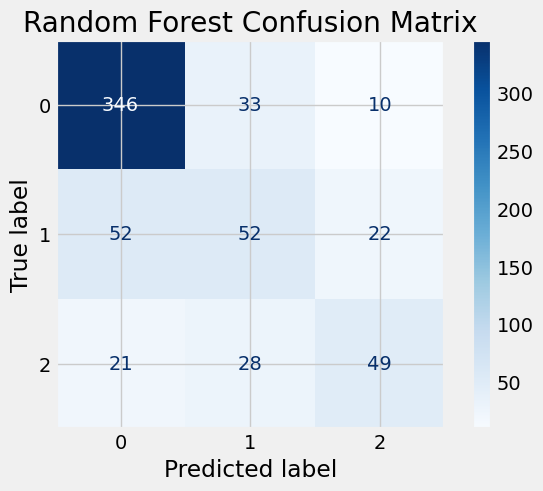

------------------------------------------------------------
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       389
           1       0.38      0.50      0.43       126
           2       0.50      0.59      0.54        98

    accuracy                           0.69       613
   macro avg       0.60      0.63      0.61       613
weighted avg       0.74      0.69      0.71       613

Naive Bayes Accuracy: 0.6949
Naive Bayes RMSE: 0.6462


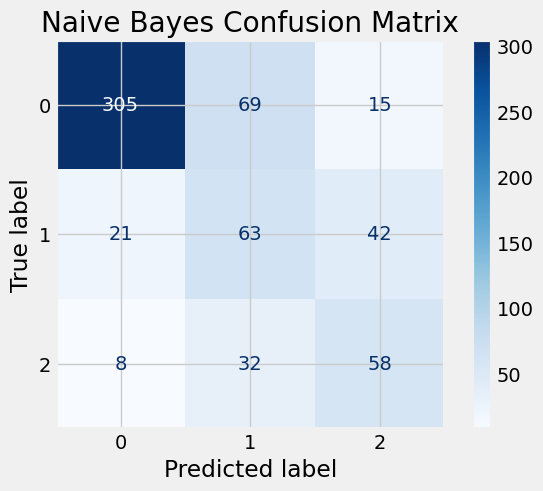

------------------------------------------------------------
SVC (SVD) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       389
           1       0.41      0.40      0.41       126
           2       0.47      0.53      0.50        98

    accuracy                           0.70       613
   macro avg       0.58      0.59      0.59       613
weighted avg       0.71      0.70      0.70       613

SVC (SVD) Accuracy: 0.7015
SVC (SVD) RMSE: 0.6819


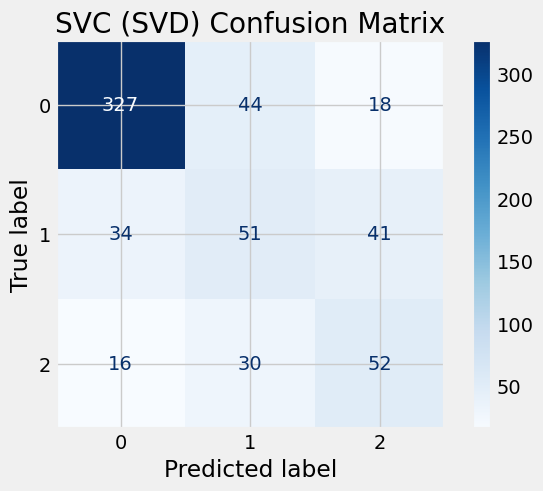

------------------------------------------------------------
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       389
           1       0.44      0.46      0.45       126
           2       0.52      0.47      0.49        98

    accuracy                           0.72       613
   macro avg       0.61      0.60      0.60       613
weighted avg       0.72      0.72      0.72       613

XGBoost Accuracy: 0.7227
XGBoost RMSE: 0.6475


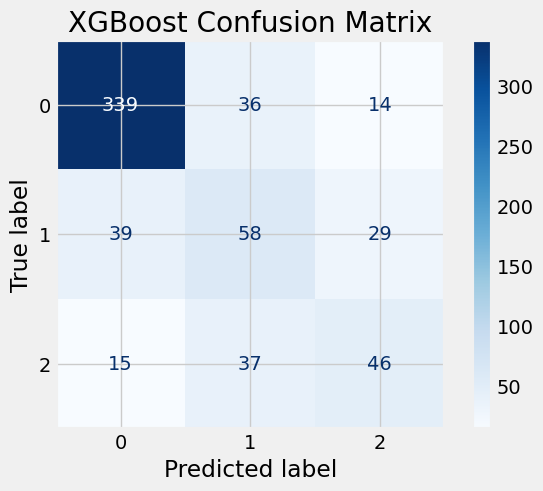

------------------------------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 3. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Model Building

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_smote, y_train_smote)
y_pred_nb = nb.predict(X_test)

# SVD (SVC in sklearn)
svc = SVC(kernel='linear')
svc.fit(X_train_smote, y_train_smote)
y_pred_svc = svc.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test)

# 5. Evaluation Function with Confusion Matrix Plotting
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print("-" * 60)

# Evaluate all models and plot their confusion matrices
models = {
    'Logistic Regression': y_pred_log_reg,
    'Random Forest': y_pred_rf,
    'Naive Bayes': y_pred_nb,
    'SVC (SVD)': y_pred_svc,
    'XGBoost': y_pred_xgb
}

for name, y_pred in models.items():
    evaluate_model(y_test, y_pred, name)


# Hyperparameter Tuning.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    
}
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Use the best model to predict
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best accuracy score:  0.7418363244781082


In [88]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the parameter grid
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
}

# Initialize the SMOTE
smote = SMOTE(random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Create a pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', smote),
    ('xgb', xgb_model)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Use the best model to predict
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Best accuracy score:  0.7357248525874874


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 80, 60],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print("Classification Report for Best Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.4f}".format(rf_accuracy))

# RMSE
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest RMSE: {:.4f}".format(rf_rmse))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for Best Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       389
           1       0.42      0.38      0.40       126
           2       0.57      0.51      0.54        98

    accuracy                           0.72       613
   macro avg       0.61      0.59      0.60       613
weighted avg       0.71      0.72      0.72       613

Random Forest Accuracy: 0.7227
Random Forest RMSE: 0.6361


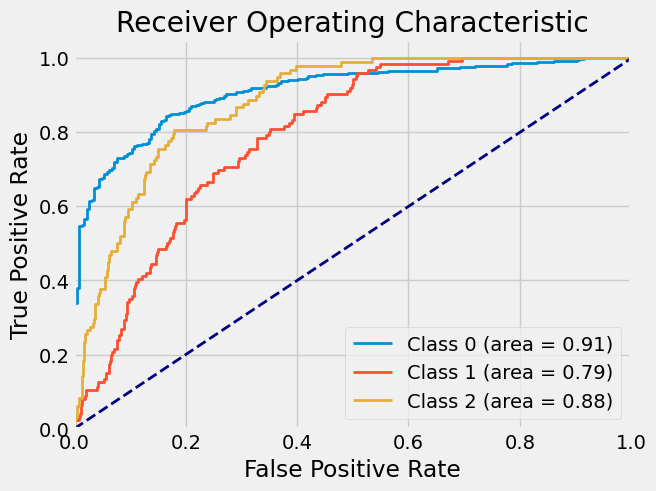

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import label_binarize

# Define best parameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200
}

# Initialize XGBoost model with best parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Predict probabilities for each class
y_prob = xgb_model.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Update classes based on your labels
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Interpretation:

ROC Curves for Each Class:

Class 0 (Blue Curve):
This class has the highest ROC curve, which means it has the best performance among the three classes.
The Area Under the Curve (AUC) is 0.91, indicating strong performance.
Class 2 (Yellow Curve):
This class also performs well, with an AUC of 0.88.
Class 1 (Red Curve):
This class has the lowest ROC curve, with an AUC of 0.79, indicating that the model is less effective at distinguishing this class from others.
Diagonal Line (Dashed Blue Line):

The diagonal line represents a random classifier, which has an AUC of 0.5. Any ROC curve above this line indicates that the classifier performs better than random guessing.
Overall Performance:

The AUC values for all classes are above 0.7, indicating that the model performs reasonably well for all classes, though there is some variation in performance, with Class 0 performing the best and Class 1 the worst.
In summary, the model has strong discriminative ability for Class 0 and Class 2, while its performance is somewhat weaker for Class 1.

# Model Evaluation.

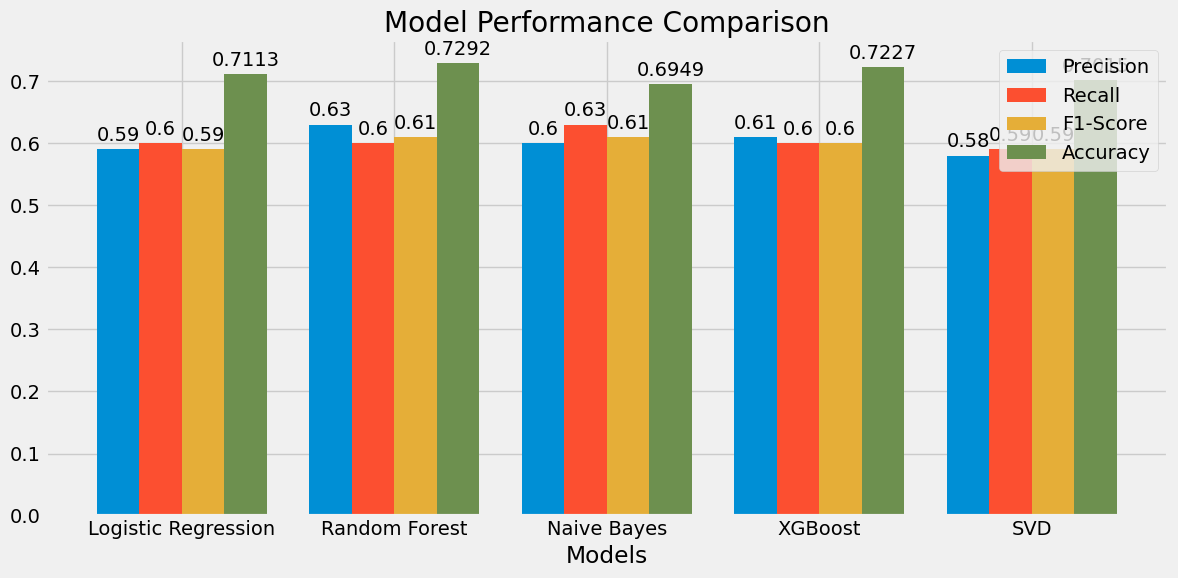

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost', 'SVD']
precision = [0.59, 0.63, 0.60, 0.61, 0.58]  # Macro average precision
recall = [0.60, 0.60, 0.63, 0.60, 0.59]     # Macro average recall
f1_score = [0.59, 0.61, 0.61, 0.60, 0.59]   # Macro average F1-score
accuracy = [0.7113, 0.7292, 0.6949, 0.7227, 0.7015]  # Accuracy

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()


# After Tuning.

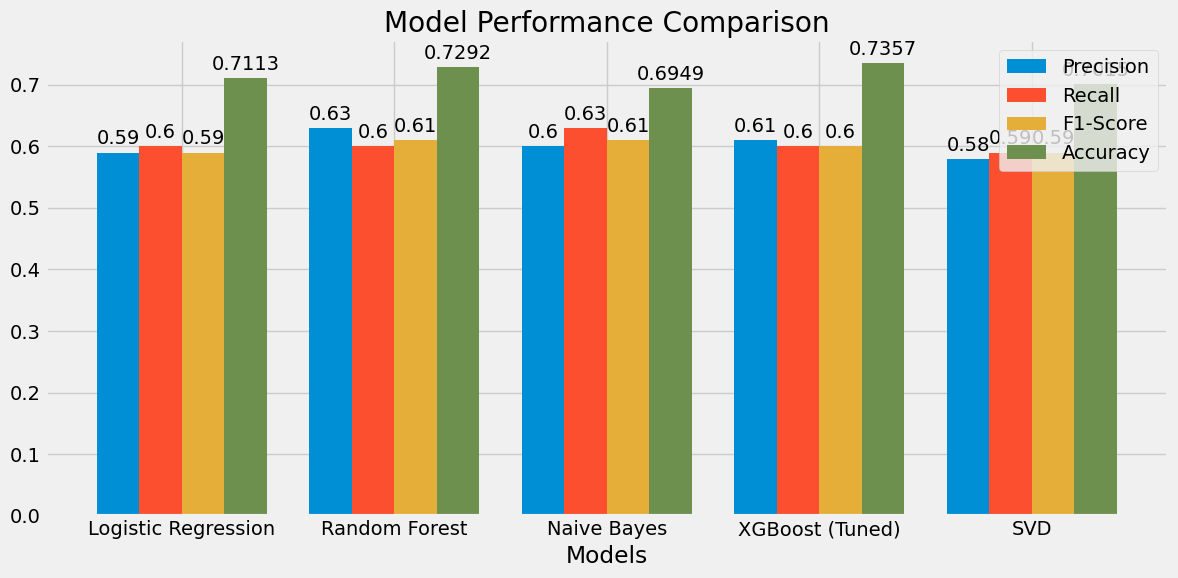

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost (Tuned)', 'SVD']
accuracy = [0.7113, 0.7292, 0.6949, 0.7357, 0.7015]
precision = [0.59, 0.63, 0.60, 0.61, 0.58]  # Macro average precision
recall = [0.60, 0.60, 0.63, 0.60, 0.59]     # Macro average recall
f1_score = [0.59, 0.61, 0.61, 0.60, 0.59]   # Macro average F1-score

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()


Tuned XGBoost has the highest accuracy (0.7357) among all the models, indicating it performs the best in correctly predicting the classes.

Random Forest is a close second with an accuracy of 0.7292 and performs well across precision, recall, and F1-score.

Logistic Regression and Naive Bayes have lower accuracy compared to the top models but might still be useful depending on specific requirements and constraints.

SVD has the lowest accuracy among the evaluated models, which suggests that XGBoost and Random Forest are more suitable for the classification task.

Overall, the tuned XGBoost model is the best-performing model based on accuracy, making it the most reliable choice for the classification task.

In [103]:
import joblib

# Assuming `best_rf` is your trained XGBoost model
joblib.dump(best_rf, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [98]:
# Load the model from the file
loaded_model = joblib.load('xgboost_model.pkl')

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test)
